# Very Simple Model of the Structure of the Milky Way Arms
## The Milky Way Model assumes 4 Arms.   The parameters come from published models.  
### However it has proved difficult to find a fully explicit models completely describing the structure.  In addition the emission model for HI has a number of components.   Future models will include more components.

Here only a very simple model of the Arms of the Milky Way is presented.

Glen Langston, 2021 October 15, NSF


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
#phi = np.arange(0.0, 2.75*np.pi,.0001)
#The phis are the indexis along the arm 
phi = np.arange(0.0, 3.*np.pi,.0001)
nphi = len(phi)
print("Dividing each Arm model into %d segments" % (nphi))

# Bar position at the End of Norma Arm sets the Start
# Sagittarius-Carina is at other end of the bar.
# start in Degrees
phi0 = (90-32.)   # phi0 is the angle of the start of the Norma-Cygnus arem
# you can try different models by changing the start locations of the arms
phi0 = (90-40.)   # phi0 is the angle of the start of the Norma-Cygnus arem

#The mark the start locations of two of the Arms at the End
#of the Milky Way Bar and the other two arms are perpendicular
#to these start positions.
#Vallee 2016 arm origin positions
thetais = [-270.+phi0, -180.+phi0, phi0, phi0-90.]
#Steiman-Cameron
thetais = [-180+phi0, -90.+phi0+20., 90.+phi0, phi0]
coloris = ["green", "blue", "gold", "red"]
styleis = ["-", "--", "-.", ":"]
# convert to radians
phiis = np.radians(thetais)
labelis = ["Sagittarius-Carina", "Scutum-Crux", \
           "Perseus", "Norma-Cygnus"]

# Structure prameters for Milky Way's 4 arms are
# For Expontial model of Vallee 2008
# Astronomical Journal, Vol 135, page 1301
#
# Fit values from Steiman-Cameron, Wolfire and Hollenbach 2010
# Astrophyscial Journal, Vol 722, page 1460

ais = [0.246, 0.608, 0.449, 0.378]
alphais = [0.242, 0.279, 0.249, 0.240]

Dividing each Arm model into 94248 segments


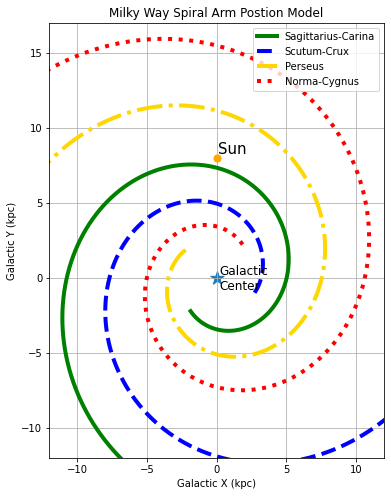

In [4]:
# prepare to plot the location of the Arms of the Milky Way.
fig, ax = plt.subplots(figsize=(6,8))
Xsun = 0.
Ysun = 8.0   # +/- 0.3 kpc
# Now mark our location in the Milky Way
ax.scatter( Xsun, Ysun, marker='o', s=50, c="orange")
ax.text( 0.1, Ysun+.3, "Sun", fontsize=15)

Vsun = 240  # km/sec
# for each of the Milky Way's Spiral Arms
for iii in range(4):
    ai = ais[iii]
    alphai = alphais[iii]
    phi0 = phiis[iii]
    r = ai * np.exp( alphai * phi)
    R3 = 2.9/ai
    # X and Y are relative to the galactic Center
    x = R3 * r * np.cos( phi + phi0)
    y = R3 * r * np.sin( phi + phi0)
    # Dx, DY are relative to the Sun
    dx = Xsun - x
    dx2 = dx*dx
    dy = Ysun - y
    dy2 = dy*dy
    dr2 = dx2+dy2
    #compute distance to sun
    Rsun = np.sqrt(dr2)
    lons = np.arctan2(-dx,dy)
    
    ax.plot(x, y, ls=styleis[iii], lw=4, label=labelis[iii], color=coloris[iii])
    # now want to save the postions of each arm
    if iii == 0:
        xs = [x]
        ys = [y]
        Rsuns = [Rsun]
        ls = [lons]
    else:
        xs.append(x)
        ys.append(y)
        Rsuns.append(Rsun)
        ls.append(lons)

ax.set(xlabel='Galactic X (kpc)', ylabel='Galactic Y (kpc)',
       title='Milky Way Spiral Arm Postion Model')
ax.grid()
plt.xlim(-12., 12.)
plt.ylim(-12., 17.)
ax.legend(loc="best")

Xgal = 0.
Ygal = 0.
ax.scatter( Xgal, Ygal, marker='*', s=200)
ax.text( 0.2, 0.2, "Galactic", fontsize=12)
ax.text( 0.2, -0.8, "Center", fontsize=12)
plt.show()

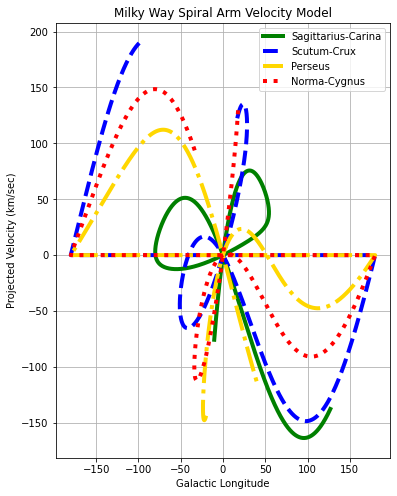

In [5]:
# Now compute the relative velocities
# and arm angles relative to the line of site.
# prepare to plot the location of the Arms of the Milky Way.
fig, ax = plt.subplots(figsize=(6,8))

Vsun = 240  # km/sec
Vgal = Vsun # for the time being, assume constant rotation speed

# for each of the Milky Way's Spiral Arms
for iii in range(4):
#for iii in [0]:
    # retrive the parameters needed to compute apparent velocities
    #   
    x = xs[iii]
    y = ys[iii]
    # distances of parts of arms to sun
    Rsun = Rsuns[iii]
    # galactic longitudes of parts of arm
    lons = ls[iii]
    n = len(x)
    # velocities are assumed circular, ie perpendicular to radius
    # compute angle relative to the galactic center
    theta = np.arctan2( y, x)
    #now only need the projected velocities in the direction of arm
    alpha = lons - theta
    Vp = Vgal * np.cos(alpha)
    #now compute projected Sun velocity in this direction
    VSp = Vsun * np.sin(lons)
    # now compute magnitude of projected velocity
    dVp = Vp - VSp
    # want plot in longitude degrees
    degs = np.degrees( lons)
    thetad = np.degrees(theta)
    alphad = np.degrees(alpha)
    if iii == 0:
        dVps = [dVp]
    else:
        dVps.append( dVp)
    
    ax.plot(degs, dVp, lw=4, ls=styleis[iii], label=labelis[iii], color=coloris[iii])
#    ax.plot(degs, dVp, lw=4, label=labelis[iii], color=coloris[iii])
            
ax.set(xlabel='Galactic Longitude', ylabel='Projected Velocity (km/sec)',
       title='Milky Way Spiral Arm Velocity Model')
ax.grid()
ax.legend(loc="best")

plt.show()

## Save your model of the Projected Velocity of the different arms of the Milky Way

In [6]:
fig.savefig("MilkyWaveArms1.png")

## We'll try to roughly estimate the hydgrogen emission intensity, based on the position of the Arms.   
The emission is estimated to be a linear some of the length of the segment, times a factor for reduction with distance (ie 1/r**2 or 1/r).
Now need to estimate HI brigthness of each arm.


In [7]:
#Now compute lenghts of segments for numerical integration
# Assume 4 Arms, and for each arm retreive X,Y galactic latidtude and
# compute the lenght of each model segment.
for iii in range(4):
    x = xs[iii]   # retrieve the galactic X, Y coordinates of each arm segment
    y = ys[iii]
    n = len(x)
    dl = 0.*x     # create an array of arm segment lengths
    for jjj in range(n-1):
        # compute the segment lenghts by differencing segment components
        dx = x[jjj+1] - x[jjj]
        dx2 = dx*dx
        dy = y[jjj+1] - y[jjj]
        dy2 = dy*dy
        dl[jjj] = np.sqrt(dx2+dy2)   # The segment lengths are all positive.
    dl[n-1] = dl[n-2]  # last segment is assumed equal to previous
    # start a new list of arrays or append to the list
    if iii == 0:   # create a list of arrays of arm segment lenghts.
        dls = [dl]
    else:
        dls.append(dl)

kkk = np.arange(0., n, 1.)  # Plot X axis is the sample number
# prepare to plot

# optionally skip printing
if False:
    fig, ax = plt.subplots(figsize=(6,8))


    for iii in range(4):
        dl = dls[iii]
        ax.plot(kkk, dl, lw=4, label=labelis[iii], color=coloris[iii])                           

    ax.set(xlabel='Sample', ylabel='Segment Length',
       title='Milky Way Integration Test')

    ax.grid()
    ax.legend(loc="best")


### Now Plot Total Intensity versus Galactic Longitude.   
The numerical integration breaks the arm into many small increments.
The process is to sum these incriments and sum into an array of 0 to 360 longitudes

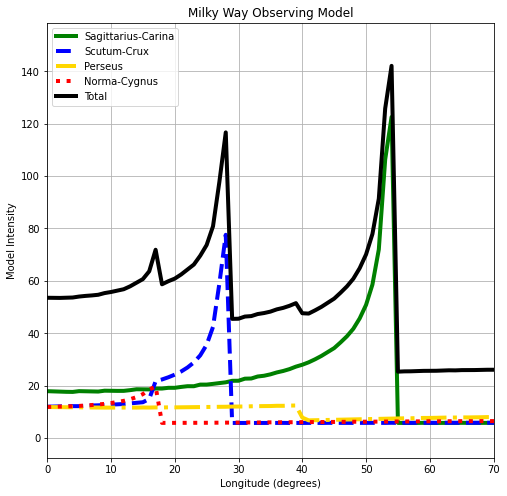

In [12]:
# lot the integrated intensity assuming constant along arms
fig, ax = plt.subplots(figsize=(8,8))

# for each of the Milky Way's Spiral Arms
# Initialize the sum of intensity at a logitude
# on box per degree
nBin = 360 
lons = np.arange(0.,nBin,1.)
Isum = 0. * lons   # init the total sum to zero.
# now add up all in each bin
for iii in range(4):
    # get longitudes of elements 
    lon = np.degrees(ls[iii])
    for jjj in range(len(lon)):
        if lon[jjj] < 0.:
            lon[jjj] = lon[jjj]+360.
    Rsun = Rsuns[iii]

    Asum = 0.*Isum   # sum each arm separately, zero sum
    dl = dls[iii]  # get segment lengths
    # compute intensity for this position and length
    intensity = 330*dl/Rsun
    # numerical integrations
    for jjj in range(len(lon)):
        # prepare to regrid onto a 0 to 360 Sum
        ilon = int(lon[jjj])
        
#        print("%d: %d %8.2f + %8.2f" % (jjj, ilon, Isum[ilon], Rsun[jjj]))
#        Asum[ilon] = Asum[ilon] + (1./(Rsun[jjj]*Rsun[jjj]))
        Asum[ilon] = Asum[ilon] + (intensity[jjj])

    ax.plot(lons, Asum, lw=4, ls=styleis[iii], label=labelis[iii], color=coloris[iii])                           
    Isum = Isum + Asum
    if iii == 0:
        sums = [Asum]
        intensities = [intensity]
    else:
        sums.append(Asum)
        intensities.append(intensity)

ax.plot(lons, Isum, lw=4, label="Total", color="black")
ax.set(xlabel='Longitude (degrees)', ylabel='Model Intensity',
       title='Milky Way Observing Model')

ax.grid()
plt.xlim(0, 70.)
#plt.ylim(-12., 17.)
ax.legend(loc="best")


## Next compare the Intensity profiles on opposite Sides of the Galactic Center
Because of the Milky Way's spiral shape, the galactic emissin is not symetric about the center of our view of the center of the Milky Way.

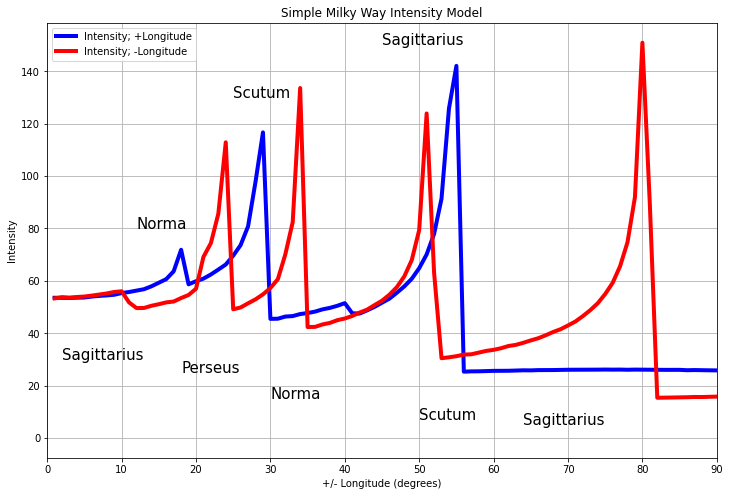

In [15]:
# Zoom in on +/- galactic longitude near the galactic center.
# the plots show 0 to 90 and 270 to 360 ( == -90 to 0)
# Prepare to plot
fig, ax = plt.subplots(figsize=(12,8))

# first plot the total sum.
ax.plot(lons, Isum, lw=4, label="Intensity; +Longitude", color="blue")
Msum = 0. * Isum
Mlons = lons
n = len(lons)
n2 = int( n/2.) + 1
jjj = 0
kkk = n - 1

# Flip the x axis to so the galactic plane symetry
#Postive verus negative longitude
for iii in range(n2):
    Mlons[jjj] = 360. - lons[kkk]
    Msum[jjj] = Isum[kkk]
    jjj = jjj + 1
    kkk = kkk - 1
 
# plot 270 to 360 == 0 to -90
ax.plot(Mlons, Msum, lw=4, label="Intensity; -Longitude", color="red")

#mark the locations of emission due to tangent points in the arms
ax.text( 12, 80, "Norma", fontsize=15)
ax.text( 25, 130, "Scutum", fontsize=15)
ax.text( 45, 150, "Sagittarius", fontsize=15)
ax.text( 64, 5, "Sagittarius", fontsize=15)
ax.text( 18, 25, "Perseus", fontsize=15)
ax.text( 2, 30, "Sagittarius", fontsize=15)
ax.text( 30, 15, "Norma", fontsize=15)
ax.text( 50, 7, "Scutum", fontsize=15)
#ax.text( 10, 75, "Norma", fontsize=15)

ax.set(xlabel='+/- Longitude (degrees)', ylabel='Intensity',
       title='Simple Milky Way Intensity Model')

ax.grid()
plt.xlim(0.,90.)
#plt.ylim(-12., 17.)
ax.legend(loc="best")
plt.show()

In [16]:
fig.savefig("MilkyWay1IntensityModel.png")

## You've created an ultra simple model of the hydrogen intensity as a function of angular distance from the center of the Milky Way.  In this model the arms show up as intensity peaks at different longitudes.
## Your radio telescope observations will show different features, indicating that the Milky Way is more than just a set of spiral arms.
## What do you think your observations will show?
# Congratulations!